# Summary of this notebook
In this notebook we explore the created dataset. First the process documentations and then the ground truths are explored.

# Exploring the process documentations

In [1]:
# lets look at the images representing the process documentations
from multimodalgenai.io import read_image_paths_from_index
import pandas as pd

number_of_images = {}
for i in range(123):
    number_of_images[i] = len(read_image_paths_from_index(i))

s_number_of_images = pd.Series(number_of_images)

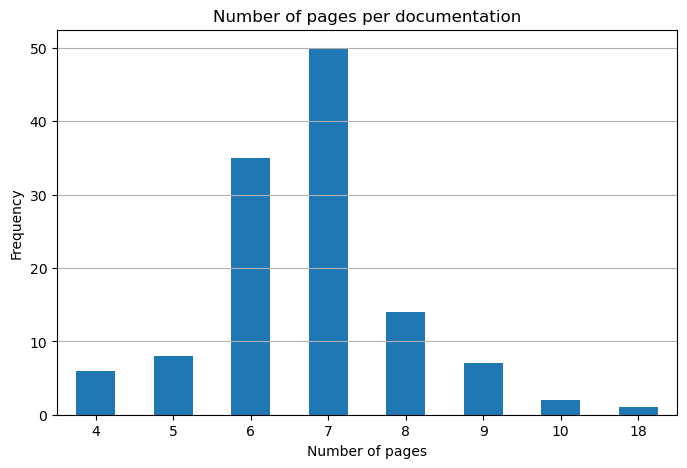

In [5]:
# and plot their frequency
import matplotlib.pyplot as plt
def plot_value_counts(series):
    value_counts = series.value_counts().sort_index()
    
    plt.figure(figsize=(8, 5))
    value_counts.plot(kind='bar')
    plt.title('Number of pages per documentation')
    plt.xlabel('Number of pages')
    plt.ylabel('Frequency')
    plt.xticks(rotation=0)
    plt.grid(axis='y')
    plt.show()

# Plotting the occurrences of each value in the provided series
plot_value_counts(s_number_of_images)

# Exploring the JSON Ground Truths

In [4]:
# Lets extract at the used elements in the ground truths:
from multimodalgenai.io import read_ground_truth_from_index
ground_truths = []
for i in range(123):
    ground_truths.append(read_ground_truth_from_index(i))

element_count = [
    len(
        gt["tasks"] +
        gt["events"] +
        gt["gateways"] +
        gt["pools"] +
        [lane for pool in gt["pools"] for lane in pool.get("lanes", [])] + 
        gt["sequenceFlows"] +
        gt["messageFlows"]
    )
    for gt in ground_truths
]

tasks = [task for gt in ground_truths for task in gt["tasks"]]
events = [event for gt in ground_truths for event in gt["events"]]
gateways = [gateway for gt in ground_truths for gateway in gt["gateways"]]
pools = [pool for gt in ground_truths for pool in gt["pools"]]
lanes = [lane for pool in pools for lane in pool["lanes"]]
sequence_flows = [sequenceFlow for gt in ground_truths for sequenceFlow in gt["sequenceFlows"]]
message_flows = [messageFlow for gt in ground_truths for messageFlow in gt["messageFlows"]]   

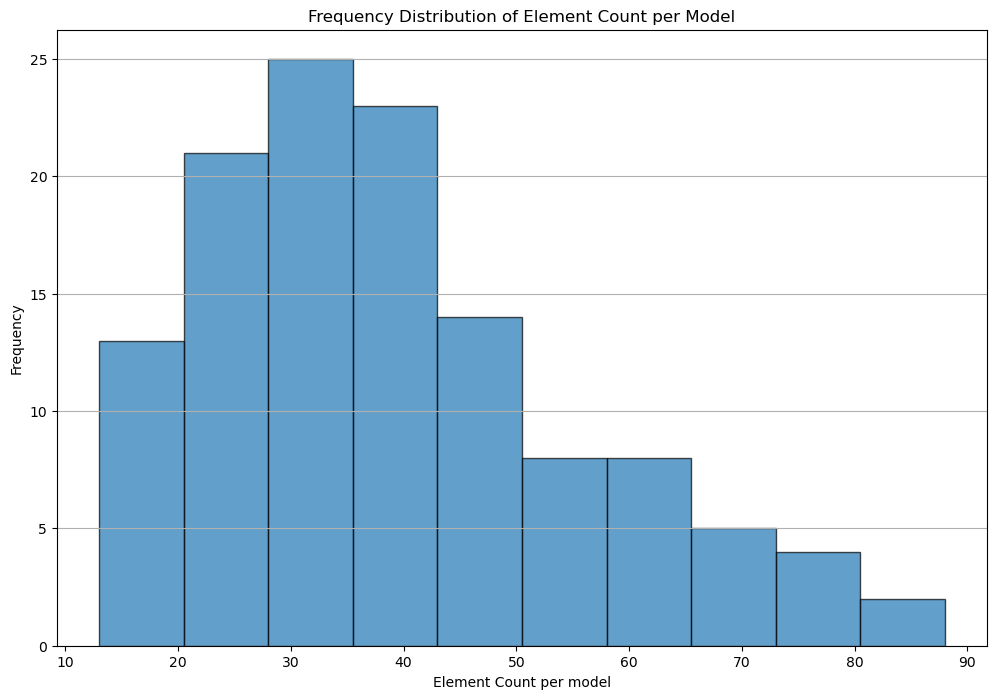

Min, Max:  Element Count    13
dtype: int64 Element Count    88
dtype: int64 Element Count    38.95935
dtype: float64


In [14]:
# Lets print the element count frequency
import pandas as pd
df = pd.DataFrame(element_count, columns=['Element Count'])
plt.figure(figsize=(12, 8))
df['Element Count'].plot(kind='hist', bins=10, edgecolor='black', alpha=0.7)
plt.title('Frequency Distribution of Element Count per Model')
plt.xlabel('Element Count per model')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

print("Min, Max: ", df.min(), df.max(), df.mean())

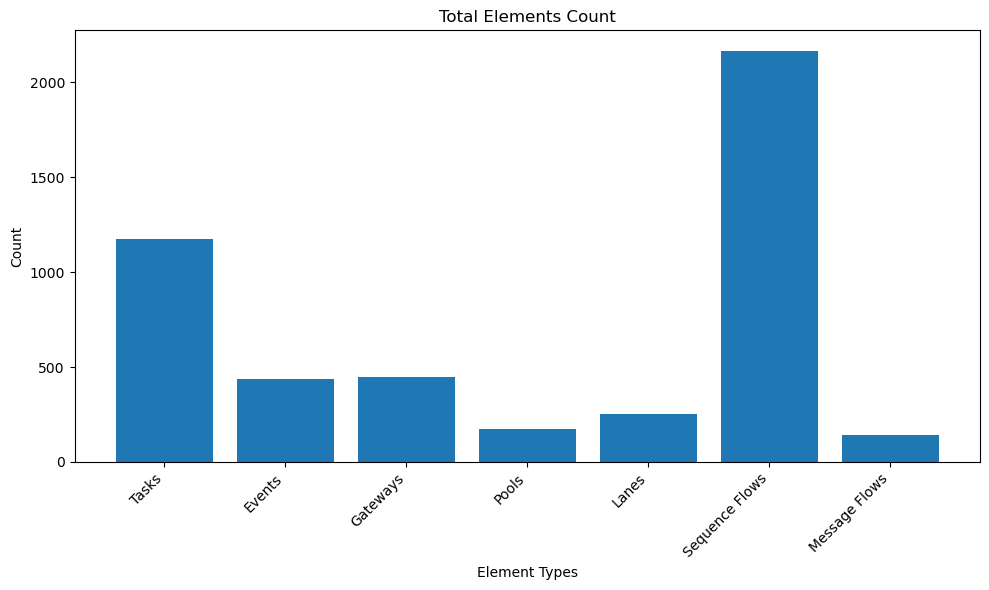

1174 437 450 174 252 2165 140


In [18]:
# lets calulcate the total numbers of elements and their types:

from collections import Counter
n_tasks  = len(tasks)
n_events = len(events)
n_gateways = len(gateways)
n_pools = len(pools)
n_lanes = len(lanes)
n_sequence_flows = len(sequence_flows)
n_message_flows = len(message_flows)

# Create bar chart with updated values
categories = ["Tasks", "Events", "Gateways", "Pools", "Lanes", "Sequence Flows", "Message Flows"]
values = [n_tasks, n_events, n_gateways, n_pools, n_lanes, n_sequence_flows, n_message_flows]
plt.figure(figsize=(10, 6))
plt.bar(categories, values)
plt.title('Total Elements Count')
plt.xlabel('Element Types')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(n_tasks, n_events, n_gateways, n_pools, n_lanes, n_sequence_flows, n_message_flows)




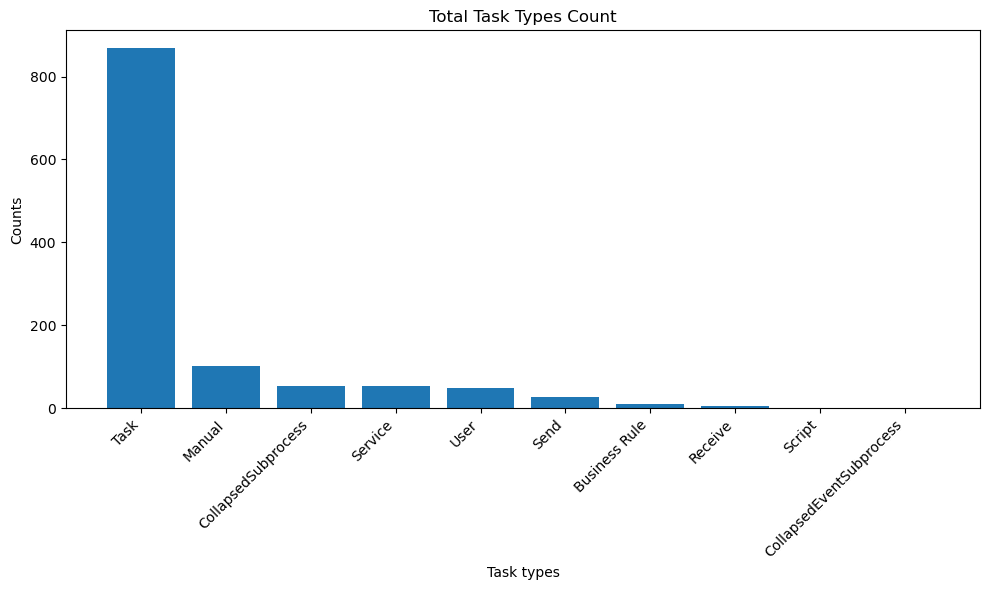

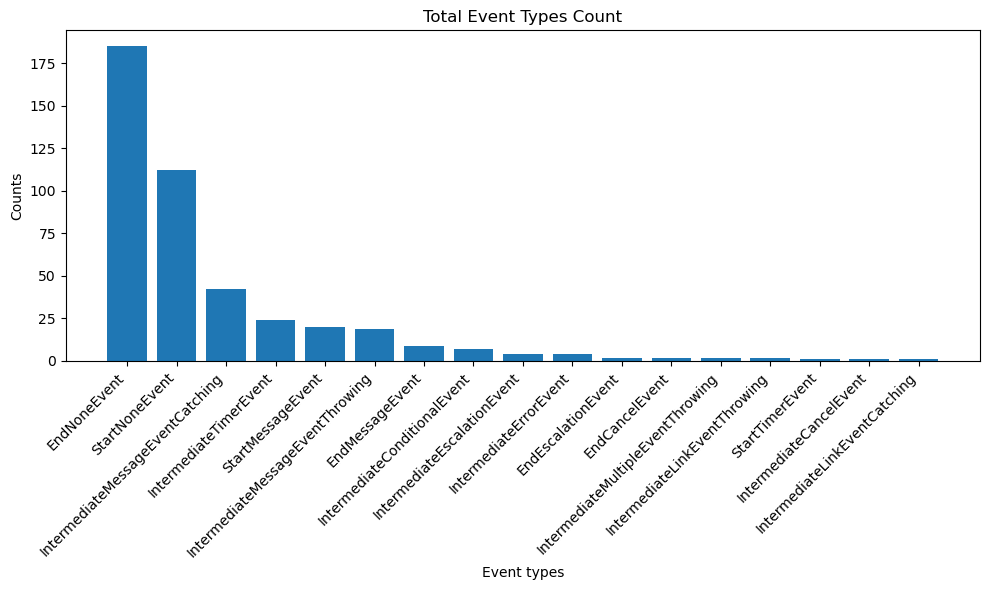

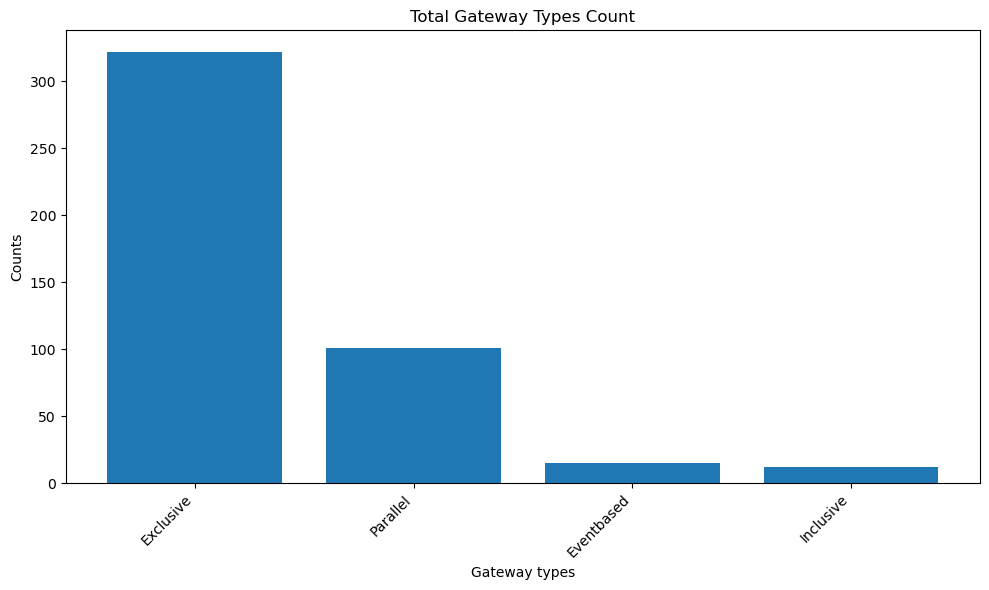

In [19]:
n_tasks_types = Counter(list(map(lambda t: t["type"],tasks)))
n_events_types = Counter(list(map(lambda t: t["type"],events)))
n_gateway_types = Counter(list(map(lambda t: t["type"],gateways)))

# Extracting keys and values from the Counter object
labels, values = zip(*n_tasks_types.items())

# Sorting the values and labels together in descending order of values


# Creating the bar chart for task types
labels, values = zip(*n_tasks_types.items())
labels, values = zip(*sorted(zip(labels, values), key=lambda x: x[1], reverse=True))
plt.figure(figsize=(10, 6))
plt.bar(labels, values)
plt.title('Total Task Types Count')
plt.xlabel('Task types')
plt.ylabel('Counts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

# Creating the bar chart for event types
labels, values = zip(*n_events_types.items())
labels, values = zip(*sorted(zip(labels, values), key=lambda x: x[1], reverse=True))
plt.figure(figsize=(10, 6))
plt.bar(labels, values)
plt.title('Total Event Types Count')
plt.xlabel('Event types')
plt.ylabel('Counts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

# Creating the bar chart for gateway types
labels, values = zip(*n_gateway_types.items())
labels, values = zip(*sorted(zip(labels, values), key=lambda x: x[1], reverse=True))
plt.figure(figsize=(10, 6))
plt.bar(labels, values)
plt.title('Total Gateway Types Count')
plt.xlabel('Gateway types')
plt.ylabel('Counts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

In [23]:
print(n_tasks_types)

Counter({'Task': 868, 'Manual': 103, 'CollapsedSubprocess': 55, 'Service': 54, 'User': 48, 'Send': 27, 'Business Rule': 11, 'Receive': 6, 'Script': 1, 'CollapsedEventSubprocess': 1})
